In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv(r'D:\Downloads\pycon-pandas-tutorial-master\data\titles.csv')
titles.head()

,title,year
0,A Trip to the Moon,2017
1,My Wife's Relatives,1939
2,Passione d'amore,1981
3,Purple Day,1999
4,Sud Side Stori,2000


In [4]:
cast = pd.read_csv(r'D:\Downloads\pycon-pandas-tutorial-master\data\cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
superman_count = cast.loc[cast['character'] == 'Superman'].groupby('year')['character'].count().reset_index(name='superman_count')
batman_count = cast.loc[cast['character'] == 'Batman'].groupby('year')['character'].count().reset_index(name='batman_count')
sup_bat_merged = superman_count.merge(batman_count, on='year')
sup_bat_merged['remarks'] = np.where(
    sup_bat_merged['superman_count'] > sup_bat_merged['batman_count'],
    'Superman Year',
    np.where(
        sup_bat_merged['superman_count'] < sup_bat_merged['batman_count'], 
        'Batman Year',
        'Same')
)
print(sup_bat_merged.loc[sup_bat_merged['remarks'] == 'Superman Year'])

   year  superman_count  batman_count        remarks
0  1973               2             1  Superman Year


In [6]:
sup_bat_merged2 = superman_count.merge(batman_count, on='year')
sup_bat_merged2['remark'] = sup_bat_merged2.apply(
    lambda x: 'Superman Year' 
    if x['superman_count'] > x['batman_count'] 
    else ('Batman Year' 
          if  x['superman_count'] < x['batman_count'] 
          else 'Same'), 
    axis=1
)
print(sup_bat_merged2.loc[sup_bat_merged2['remark'] == 'Superman Year'])

   year  superman_count  batman_count         remark
0  1973               2             1  Superman Year


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [7]:
print(sup_bat_merged2.loc[sup_bat_merged2['remark'] == 'Batman Year'])

    year  superman_count  batman_count       remark
11  2009               1             3  Batman Year
12  2010               1             3  Batman Year
13  2011               2             4  Batman Year
14  2013               1             5  Batman Year
15  2014               1             5  Batman Year
16  2015               1             4  Batman Year
17  2016               4            12  Batman Year
18  2017               5             9  Batman Year
19  2018               2             4  Batman Year


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

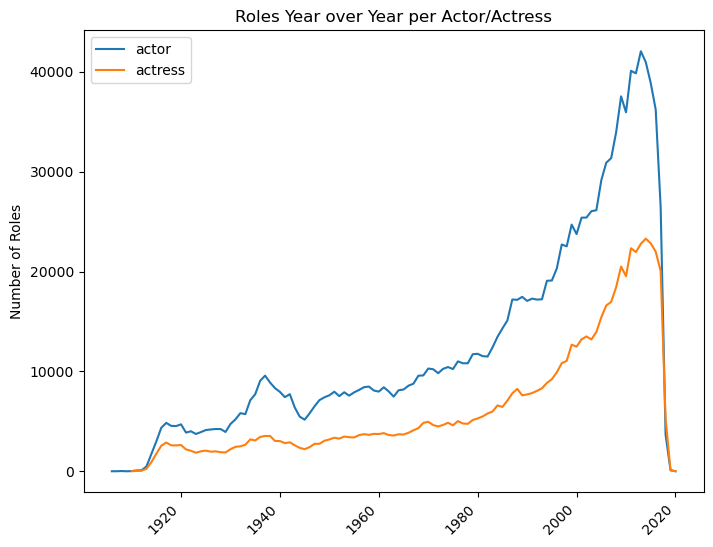

In [26]:
cast['decade'] = cast['year'] // 10 * 10

pivot = (
    cast
    .loc[
        cast['n'].notna()
    ]
    .pivot_table(
        index='year', 
        columns='type', 
        values='character', 
        aggfunc='count')
    )
pivot.plot(kind='line', figsize=(8, 6))
plt.xlabel('')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title('Roles Year over Year per Actor/Actress')
plt.show()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

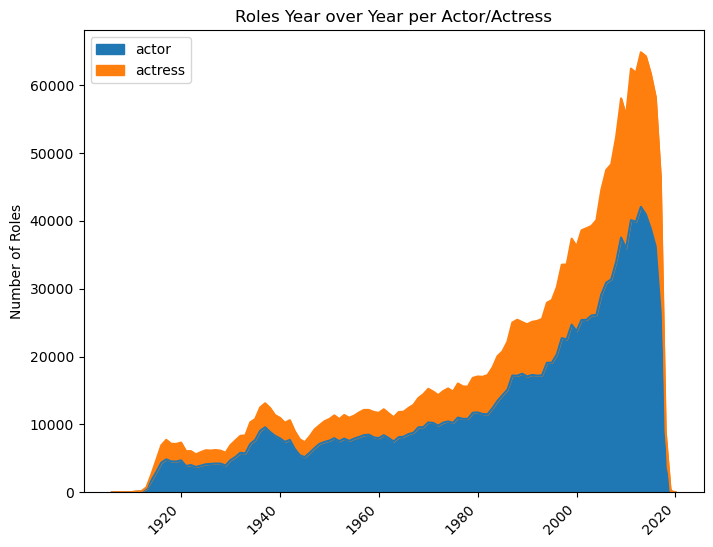

In [29]:
pivot.plot(kind='area', figsize=(8, 6))
plt.legend()
plt.xlabel('')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45, ha='right')
plt.title('Roles Year over Year per Actor/Actress')
plt.show()

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

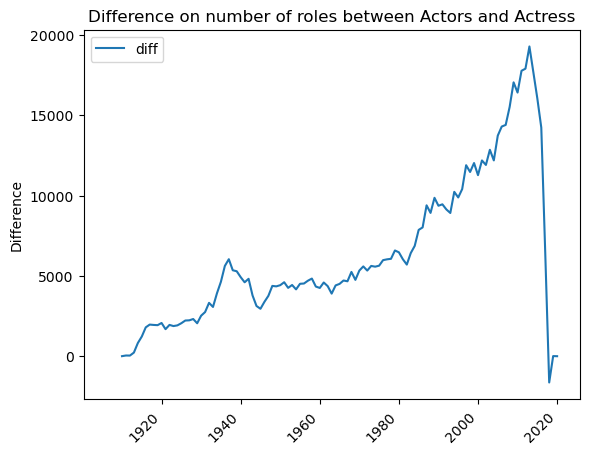

In [33]:
pivot['diff'] = pivot['actor'] - pivot['actress']
pivot['diff'].plot(kind='line')
plt.legend()
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Difference')
plt.title('Difference on number of roles between Actors and Actress')
plt.show()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

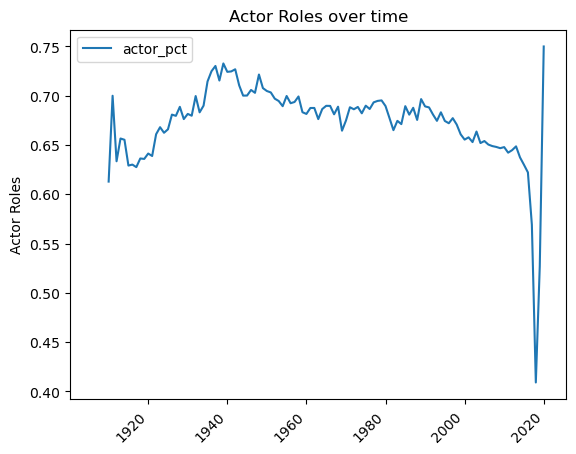

In [55]:
pivot['actor_pct'] = pivot['actor'] / (pivot['actor'] + pivot['actress'])
pivot['actor_pct'].plot(kind='line')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('Actor Roles')
plt.title('Actor Roles over time')
plt.show()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

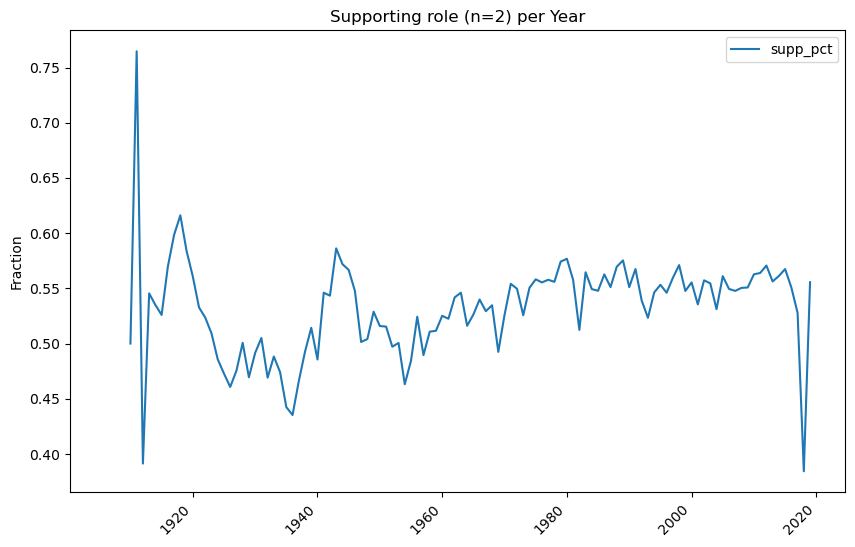

In [58]:
pivot_supporting_roles = (
    cast.loc[
        (cast['n'] == 2)
    ].
    pivot_table(
        values='character',
        index='year',
        columns='type',
        aggfunc='count'
    )
)

pivot_supporting_roles['supp_pct'] = pivot_supporting_roles['actor'] / (pivot_supporting_roles['actor'] + pivot_supporting_roles['actress'])

pivot_supporting_roles['supp_pct'].plot(
    kind='line', 
    figsize=(10,6)
    )
plt.title('Supporting role (n=2) per Year')
plt.ylabel('Fraction')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()



### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

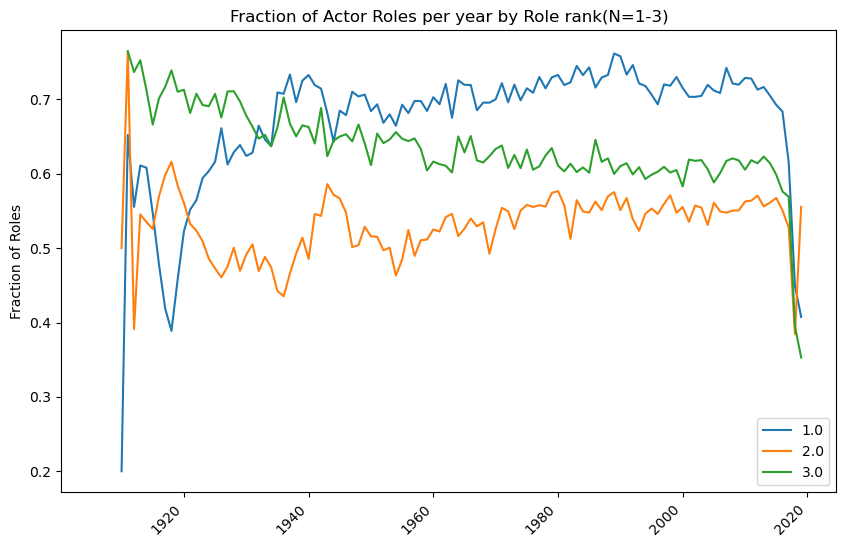

MultiIndex([(1.0,      'actor'),
            (1.0,    'actress'),
            (2.0,      'actor'),
            (2.0,    'actress'),
            (3.0,      'actor'),
            (3.0,    'actress'),
            (1.0, 'actor_frac'),
            (2.0, 'actor_frac'),
            (3.0, 'actor_frac')],
           names=['n', 'type'])

In [75]:
subset = cast[cast['n'].isin([1, 2, 3])]

pivot_rank = (
    subset.
    pivot_table(
        values='character',
        index='year',
        columns=['n', 'type'],
        aggfunc='count'
    )
)

for n in (1, 2, 3):
    actor_col= (n, 'actor')
    actress_col= (n, 'actress')
    pivot_rank[(n, 'actor_frac')] = (pivot_rank[actor_col] /
    (pivot_rank[actor_col] + pivot_rank[actress_col])
    )

pivot_rank.xs('actor_frac',axis = 1, level= 1).plot(kind='line', figsize=(10,6))
plt.title('Fraction of Actor Roles per year by Role rank(N=1-3)')
plt.legend()
plt.xlabel('')
plt.ylabel('Fraction of Roles')
plt.xticks(rotation=45, ha='right')
plt.show()

pivot_rank.columns